## author : Ashok kumar
### grip task - Decision Trees

### task 6 : understanding the working of decision trees.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('C:\\Users\\Ashok\\Desktop\\intern\\Iris.csv')

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:

df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [23]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:

df=df.drop(columns='Id',axis=1)
x=df.drop(columns='Species',axis=1)
y=df['Species']

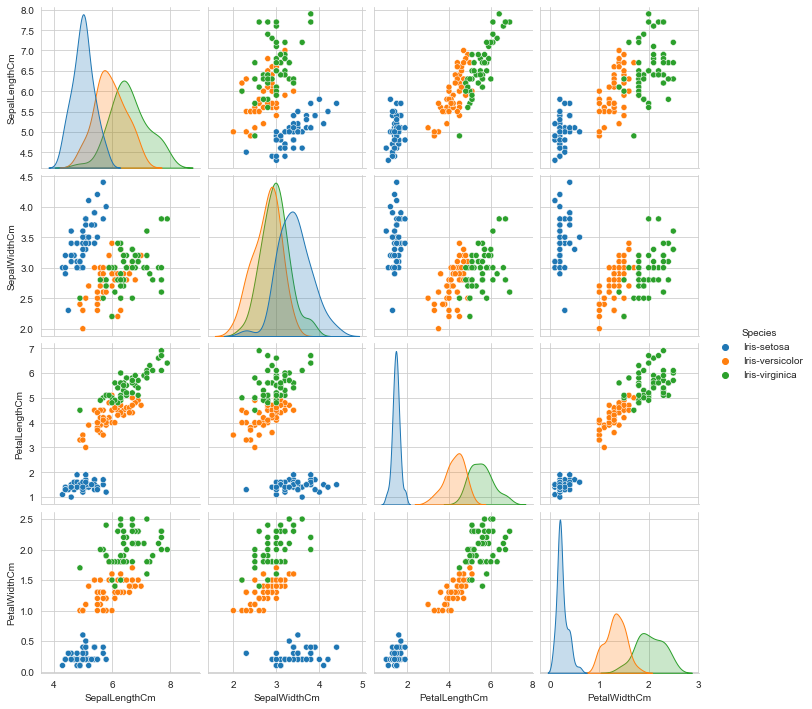

In [17]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species")
plt.show()

# Model Creation

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformers=[('oh',OneHotEncoder(),[5])]
transformed=ColumnTransformer(transformers=transformers,remainder='passthrough')

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5,random_state=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Evaluation

In [21]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print("The accuracy score is :",(accuracy_score(y_test,y_pred)*100).round(2),"%")
print('The f1 score is ',f1_score(y_test,y_pred,average='weighted'))
print('the confusion matrix for the model')
print(confusion_matrix(y_test,y_pred))

The accuracy score is : 97.37 %
The f1 score is  0.9735365763637706
the confusion matrix for the model
[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]


# Visualizing this as a graph

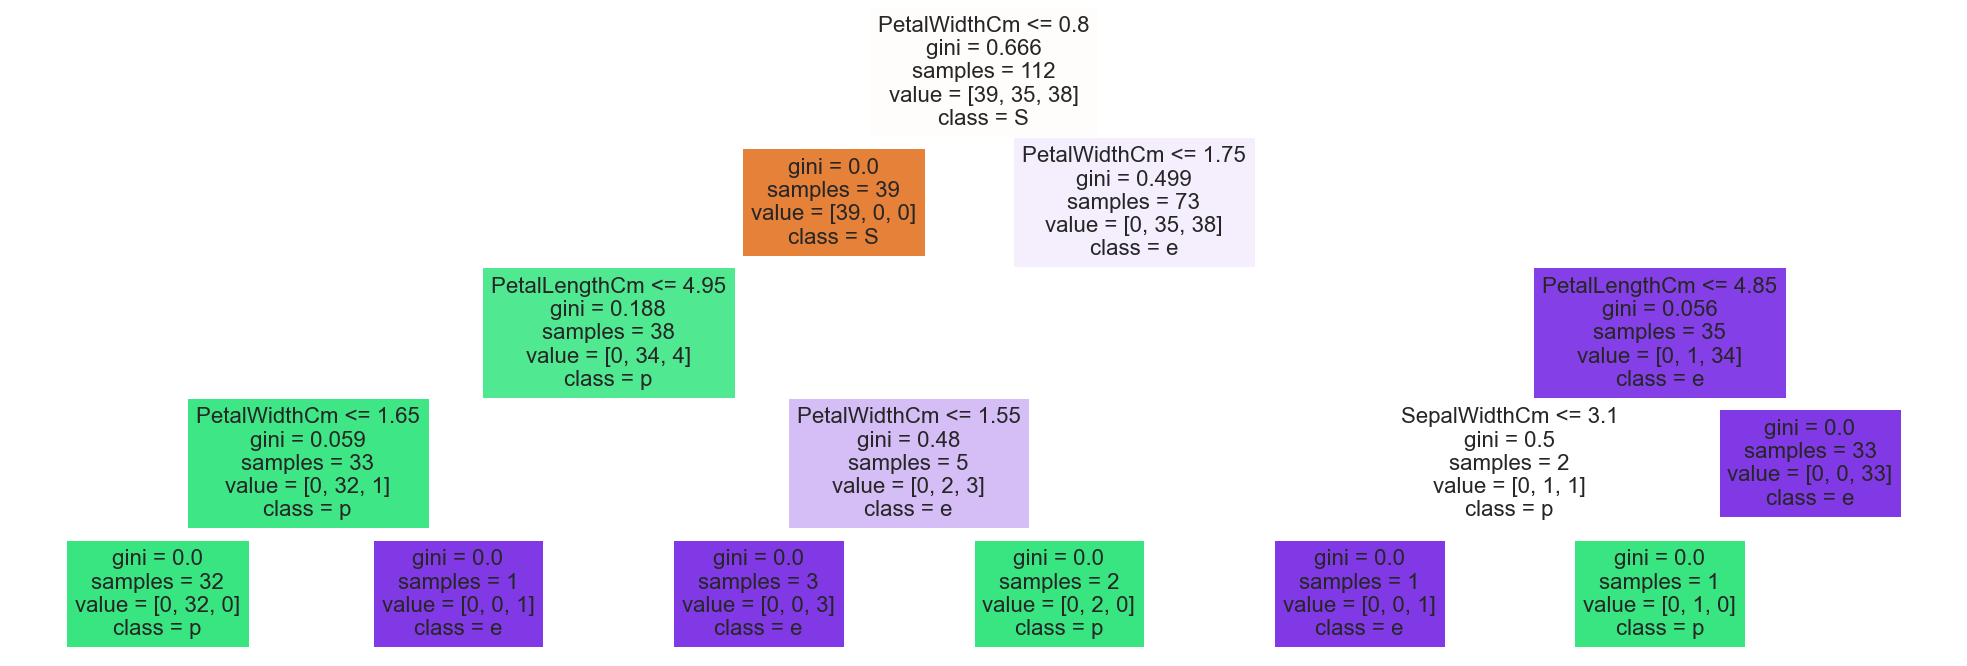

In [22]:
from sklearn import tree
plt.subplots(figsize=(35,12))
tree.plot_tree(model,feature_names=list(df),class_names='Species',filled=True);